In [10]:
import os
import sys
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline
np.random.seed(seed=12)

Populating the interactive namespace from numpy and matplotlib


## Assignment 1 : Distributions

###1 - 1: Generate Samples
Define a class include all method of assignment 1. 

In [11]:
class Distribution:

    def __init__(self, name,mean):
        ''' 
        name : mane of distributions 
        mean : population means
        '''
        self._name = name
        self._mean = mean

    def get_name(self):
        '''
        get name of distribution
        '''
        return self._name

    def get_single(self,n):
        md = {}
        if self._name == 'chisq':
        	md['chisq'] = np.random.chisquare(self._mean,size=n)
        elif self._name == 'poiss':
        	md['poiss'] = np.random.poisson(self._mean,size=n)
        elif self._name == 'expon':
            md['expon'] = np.random.exponential(self._mean,size=n)
        elif self._name == 'wald':
        	md['wald'] = np.random.wald(self._mean,10,size=n)
        elif self._name == 'norm':
        	md['norm'] = np.random.normal(self._mean,100,size=n)
        elif self._name == 'bino':
        	md['bino'] = np.random.binomial(self._mean/0.5,0.5,size=n)
        else:
        	print "Wrong!"
        return md
    
    def get_summary(self):
        '''
        generate summary of samples
        '''
        md = self.get_single()
        print ("%s mean: %.2f, standard deviation: %.2f") %(self._name,md[self._name].mean(),md[self._name].std())
    
    def get_samples(self):
        '''
        generate 100 samples from sample sizes N  10< N < 1000
        '''
        mysize=np.linspace(10,100,100)
        md = {}
        md[self._name]={}
        for n in mysize:
            md[self._name][n] = self.get_single(n)
        means = {}
        means[self._name] = {}
        for nn in md[self._name].iterkeys():
            means[self._name][nn] = md[self._name][nn][self._name].mean()
        return mysize, md, means        
    
    def get_scatter(self):
        '''
        return scatter plot between sample sizes and sample means
        '''
        mysize, md, means = self.get_samples()
        fig_mu_N = pl.figure(figsize=(10,10))
        axchisq_mu_n = fig_mu_N.add_subplot(111)
        for nn in md[self._name].iterkeys():
            axchisq_mu_n.plot(nn, means[self._name][nn], 'o')
            axchisq_mu_n.set_xlabel('sample size')
            axchisq_mu_n.set_ylabel('sample mean')
            axchisq_mu_n.plot([min(mysize), max(mysize)],[self._mean,self._mean],'k')
        
    
    def get_means(self):
        allmeans = []
        mysize, md, means = self.get_samples()
        for n in means[self._name]:
            allmeans.append(means[self._name][n])
        return allmeans

### 1 - 2 : Scatterplot Between Sample Sizes and Sample Means
Comment:
I generated random samples from six different distributions(chi-square', 'Poisson', 'exponential', 'wald','normal',binomial') with 300 population means. After that, I visualized scatter plots using sample means and sample sizes data. All of six scatter plots showed my expected result that most of sample means are nearby population mean.

Conclusion:
As we can see from six plots, most of sample means are centralize at 300(population mean). However, there are few of them are far away from the population mean. Those outliers are significantly clustering at small sample sizes area.  Therefore, we can conclude that there is no relationship between sample means and sample sizes. 

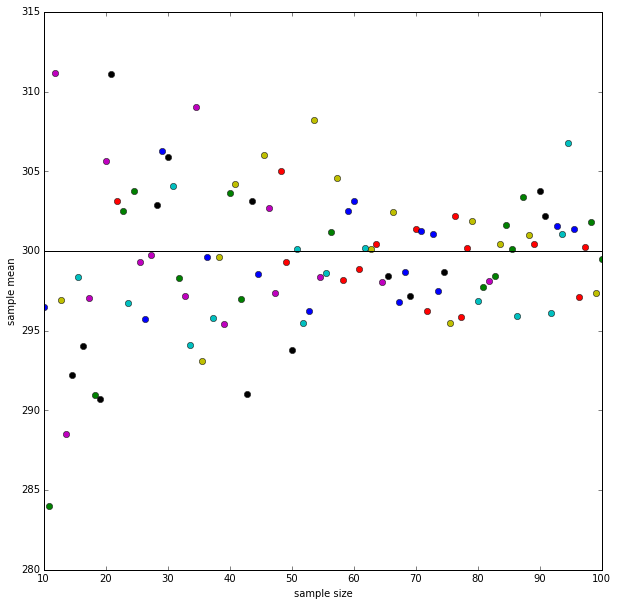

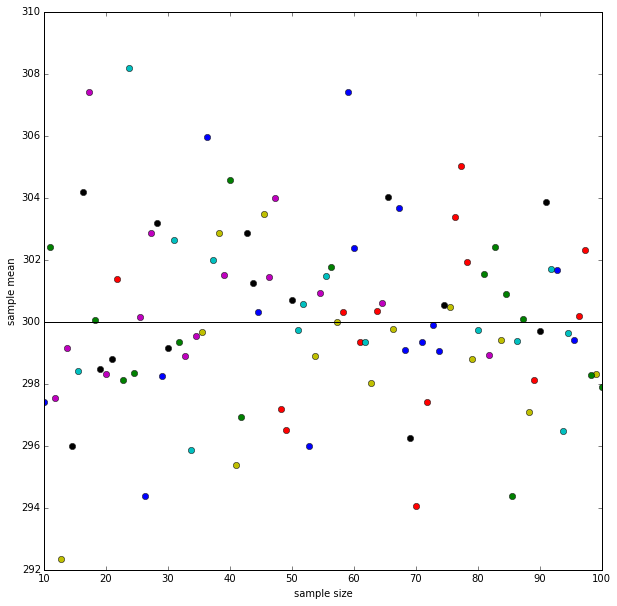

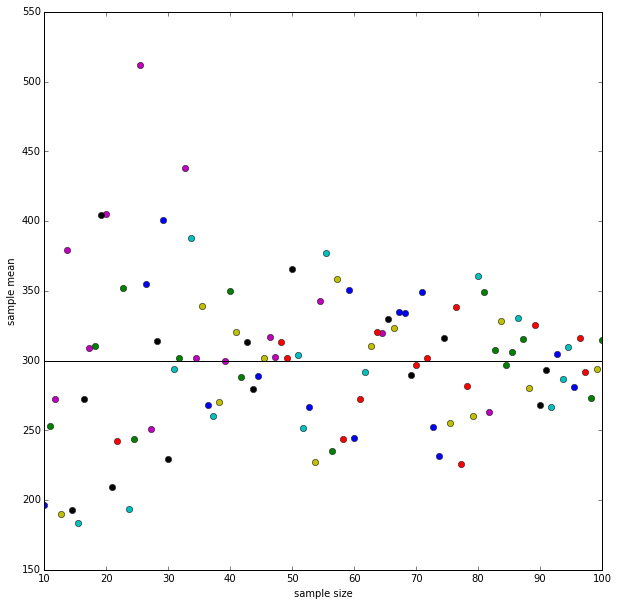

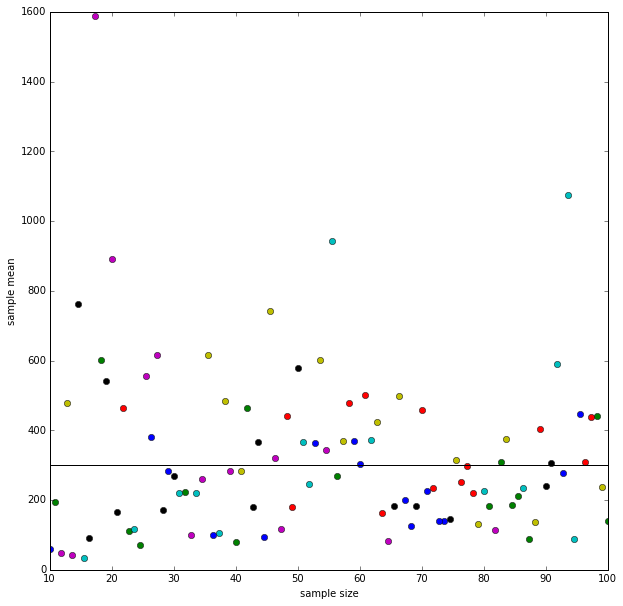

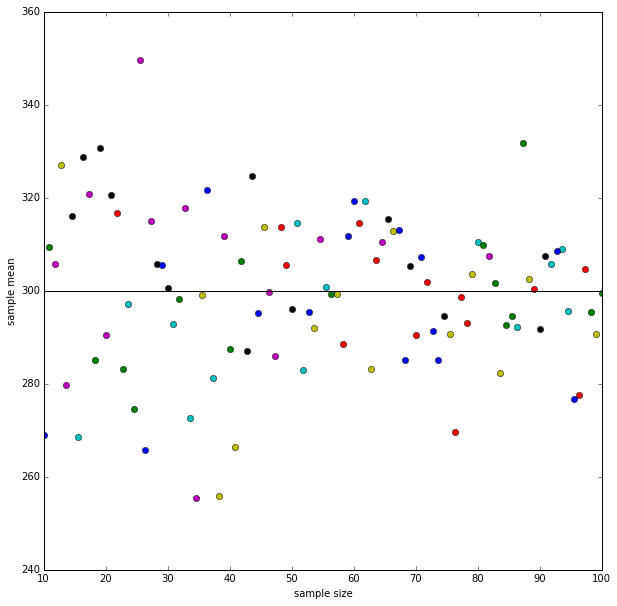

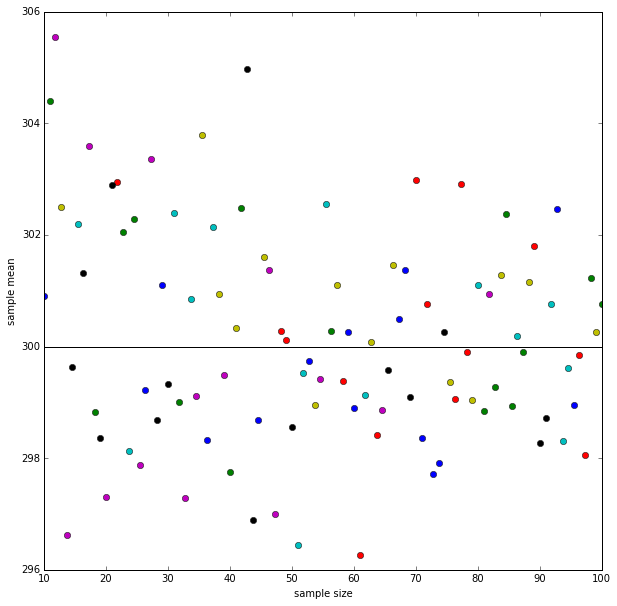

In [12]:
## get scatter plot 
distri_name = ['chisq','poiss','expon','wald','norm','bino']
fig = pl.figure(figsize=(12, 10))     
for d in range(len(distri_name)):
    dis = Distribution(distri_name[d],300)
    dis.get_scatter()

### PLOT the distributions of all sample means (together for all distributions) as a histogram, 

(array([  1.87904694e-04,   1.87904694e-04,   0.00000000e+00,
          6.57666429e-04,   3.75809388e-04,   9.39523470e-05,
          9.39523470e-05,   7.51618776e-04,   5.63714082e-04,
          5.63714082e-04,   3.75809388e-04,   1.03347582e-03,
          1.03347582e-03,   2.06695163e-03,   3.66414153e-03,
          3.32591308e-02,   3.85204623e-03,   2.25485633e-03,
          1.31533286e-03,   4.69761735e-04,   5.63714082e-04,
          1.87904694e-04,   3.75809388e-04,   1.87904694e-04,
          1.87904694e-04,   0.00000000e+00,   4.69761735e-04,
          0.00000000e+00,   9.39523470e-05,   1.87904694e-04,
          3.75809388e-04,   0.00000000e+00,   9.39523470e-05,
          0.00000000e+00,   9.39523470e-05,   0.00000000e+00,
          0.00000000e+00,   2.81857041e-04,   0.00000000e+00,
          0.00000000e+00,   1.87904694e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.39523470e-05,   0.00000000e+00,
        

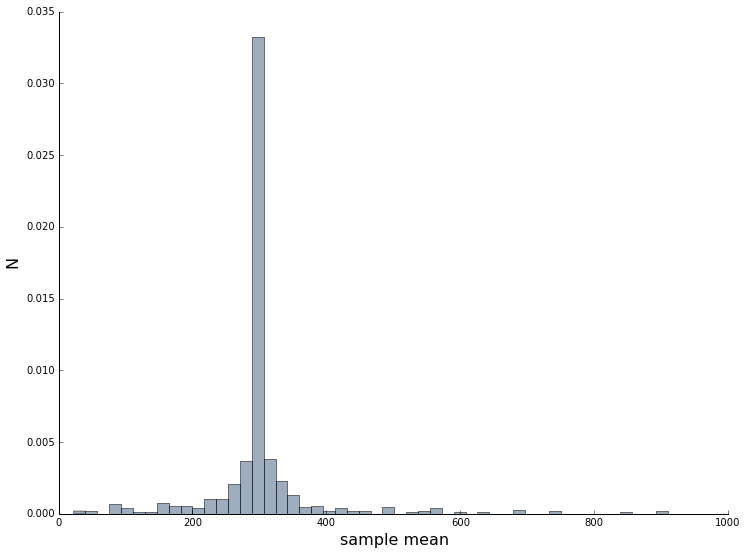

In [13]:
## get hist plot 
distri_name = ['chisq','poiss','expon','wald','norm','bino']
fig = plt.figure(figsize=(12, 10))   
means = []  
for d in range(len(distri_name)):
    dis = Distribution(distri_name[d],300)
    means.append(dis.get_means())
means = np.array(means)
means = means.reshape(1,600)
means = means.tolist() 
plt.figure(figsize=(12, 9)) 
ax = plt.subplot(111) 
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.xlabel('sample mean',fontsize=16)
plt.ylabel('N',fontsize=16)
plt.hist(means, bins=50,normed=1,alpha=0.5,color="#3F5D7D")

##what if we used the values for where the former inmate was or was not ever employed in a CEO transitional job 3 years after release (5th row of the table)? 

#$P_0 = 0.521, P_1= 0.533$

In [14]:
alpha=0.05
#we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0=52.1*0.01 
P_1=53.3*0.01

n_0=409
n_1=564

#lets get the counts by multiplying by the sample size
Nt_0=P_0*n_0
Nt_1=P_1*n_1


In [15]:
# i am goonna create a little one line function to calculate the standard dev, it is not really needed, but just to show you how you do such a thing
sp_stdev= lambda p, n: np.sqrt( p * ( 1 - p ) /n[0] +  p * ( 1 - p )/n[1]  )


sp_stdev_2y=sp_stdev((Nt_0+Nt_1)/(n_0+n_1),[n_0,n_1])
print P_0, n_0, n_1, sp_stdev_2y

0.521 409 564 0.0324224126866


In [16]:
zscore = lambda p0, p1, s : (p0-p1)/s
z_2y = zscore(P_1, P_0, sp_stdev_2y)
print z_2y


0.370114343926


In [17]:
##p-value for employment after 2 years
p_2y=1-0.6736

def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

    
report_result(p_2y,alpha)

is the p value 0.33 smaller than the critical value 0.05? 
NO!
the Null hypothesis is not rejected


#lets see what the chi sq statistics says about the employment for >6 consecutive months (raw 6)

|employed in subsadized job |     employed   | not employes   |                   
|---------------------------|----------------|------------------|---------------------------|
| test sample               | 14.7*5.64    |  85.3*5.64    | 564                       |
| control sample            | 11.9*4.09   |   88.1*4.09   | 409                       |
| total                     |  131.579      |  841.421     | 973         |

In [18]:
Ntot = 973
expected = 564*409*131.57*846.43
sample_values = [[14.7*5.64,85.3*5.64],[11.9*4.09,88.1*4.09]]
 
chisqstat= lambda N, values, expect : N*((values[0][0]*values[1][1]-values[0][1]*values[1][0])**2)/(expect)

print chisqstat(Ntot,  sample_values, expected)


1.58009570506


####Comment:
The chi-square value is 1.58 which is smaller than 3.84(chi-square value at 1 df with alpha = 0.05 ). In this situation, we cannot reject the null hypothesis: those two variables are independent. 